In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Data loading

In [2]:
df = pd.read_csv("data/raw/heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Basic EDA and visualizations

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


<AxesSubplot:>

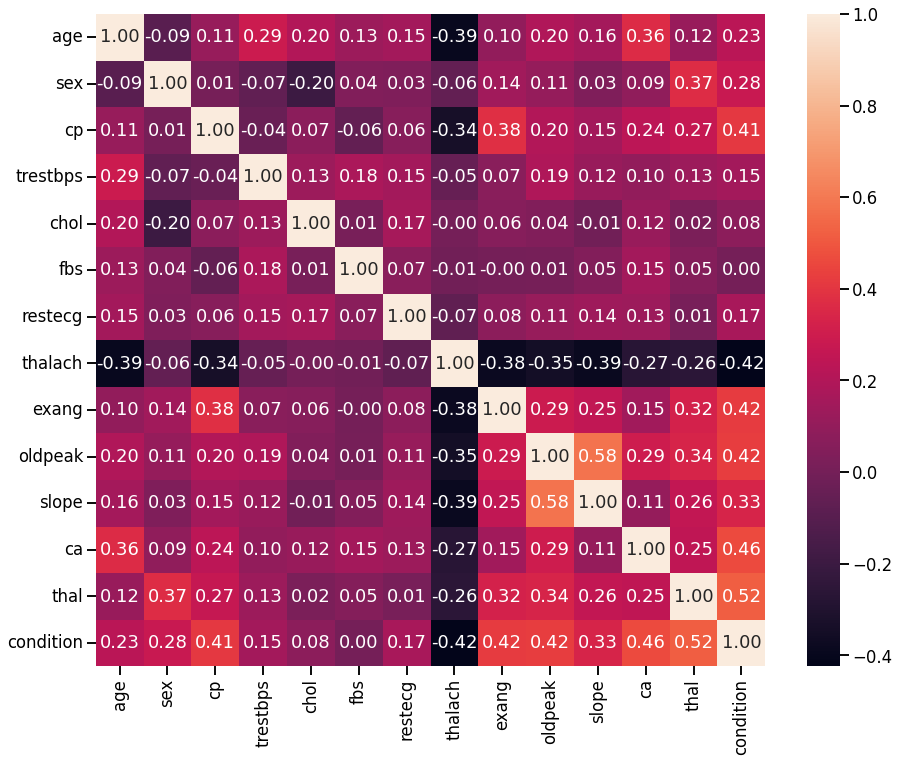

In [5]:
sns.set_context("talk")
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

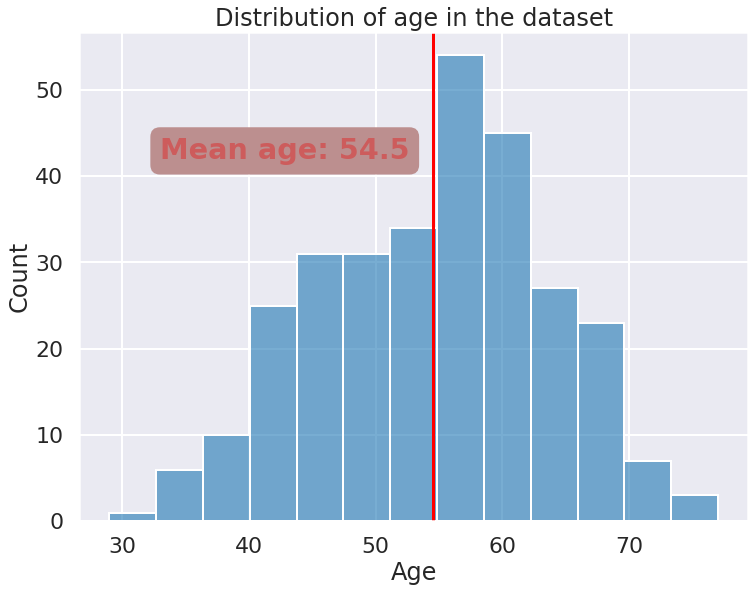

In [6]:
#Histogram of age distribution
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.histplot(data=df["age"], alpha=0.6)
plt.axvline(df["age"].mean(), color="red")
plt.title("Distribution of age in the dataset")
plt.text(33, 42, "Mean age: " + str(round(df["age"].mean(), 1)), color="indianred", weight="heavy", size="larger", bbox=dict(boxstyle="round", color="rosybrown"))
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

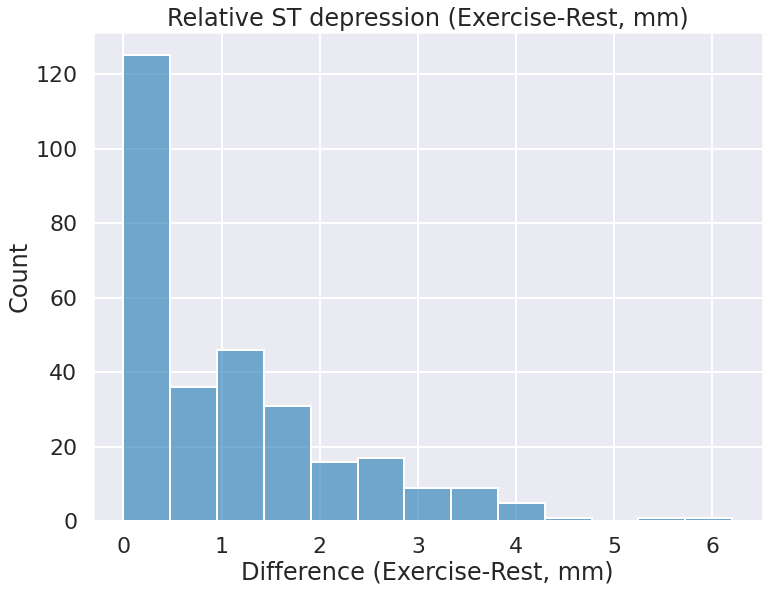

In [7]:
#Histogram of ST depression distribution
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.histplot(data=df["oldpeak"], alpha=0.6)
plt.title("Relative ST depression (Exercise-Rest, mm)")
plt.xlabel("Difference (Exercise-Rest, mm)")
plt.ylabel("Count")
plt.show()

/home/andrey/PycharmProjects/Made/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


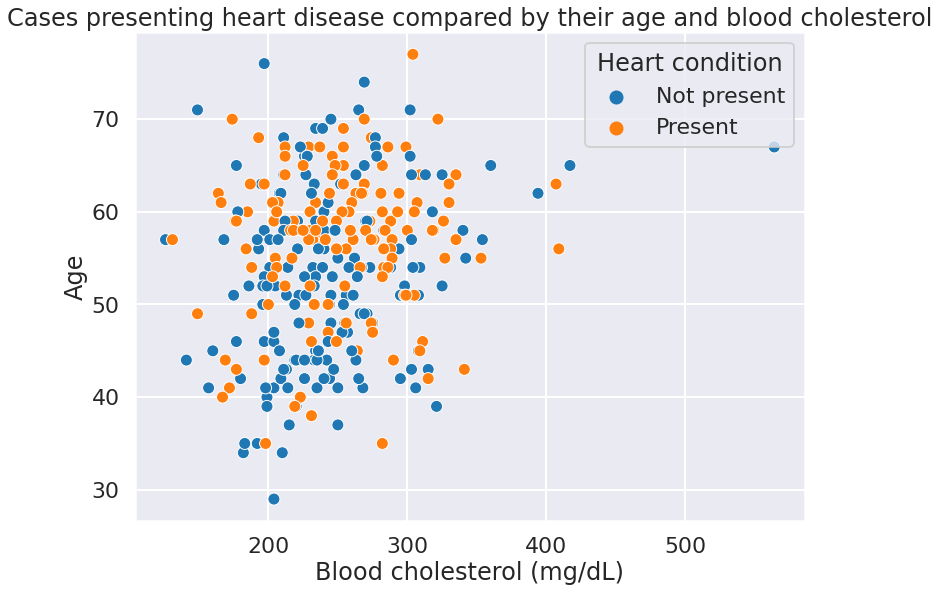

In [8]:
#I had to create a new column since Seaborn gave me some trouble with proper legend labeling, it's not essential
df["Heart condition"] = df["condition"].replace({1:"Present", 0:"Not present"})

#Part concerning the actual plotting
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("chol", "age", hue=df["Heart condition"], data=df)
plt.title("Cases presenting heart disease compared by their age and blood cholesterol")
plt.xlabel("Blood cholesterol (mg/dL)")
plt.ylabel("Age")
plt.show()

/home/andrey/PycharmProjects/Made/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


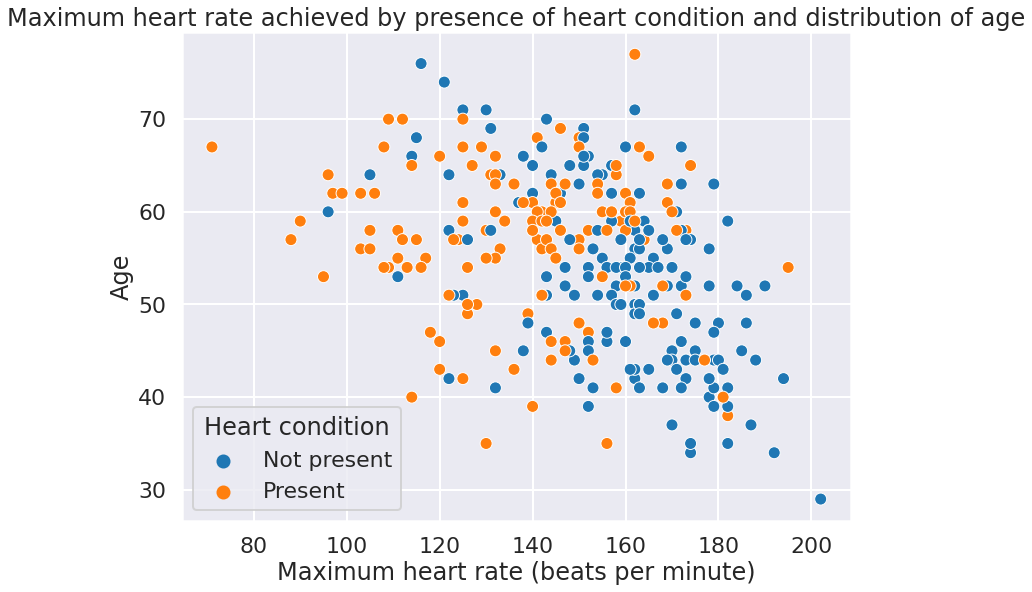

In [9]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("thalach", "age", hue=df["Heart condition"], data=df)
plt.title("Maximum heart rate achieved by presence of heart condition and distribution of age")
plt.xlabel("Maximum heart rate (beats per minute)")
plt.ylabel("Age")
plt.show()

/home/andrey/PycharmProjects/Made/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


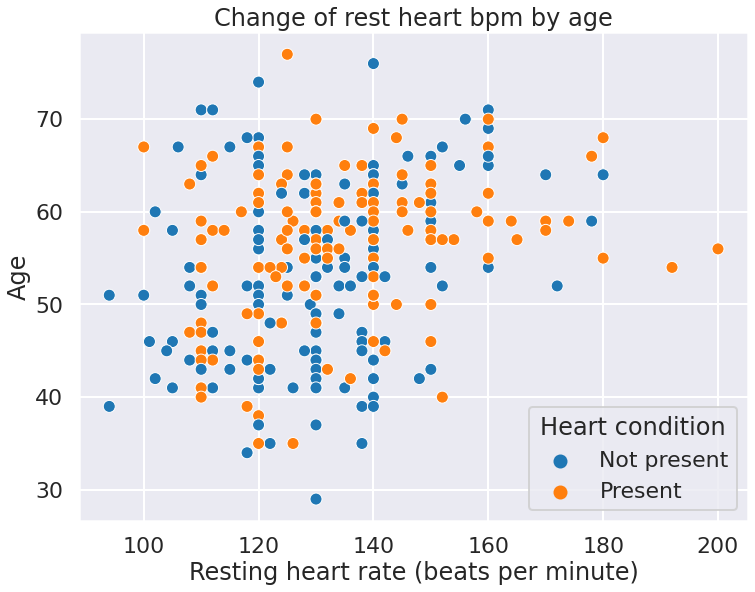

In [10]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(12, 9))
sns.scatterplot("trestbps", "age", hue=df["Heart condition"], data=df)
plt.title("Change of rest heart bpm by age")
plt.xlabel("Resting heart rate (beats per minute)")
plt.ylabel("Age")
plt.show()

/home/andrey/PycharmProjects/Made/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


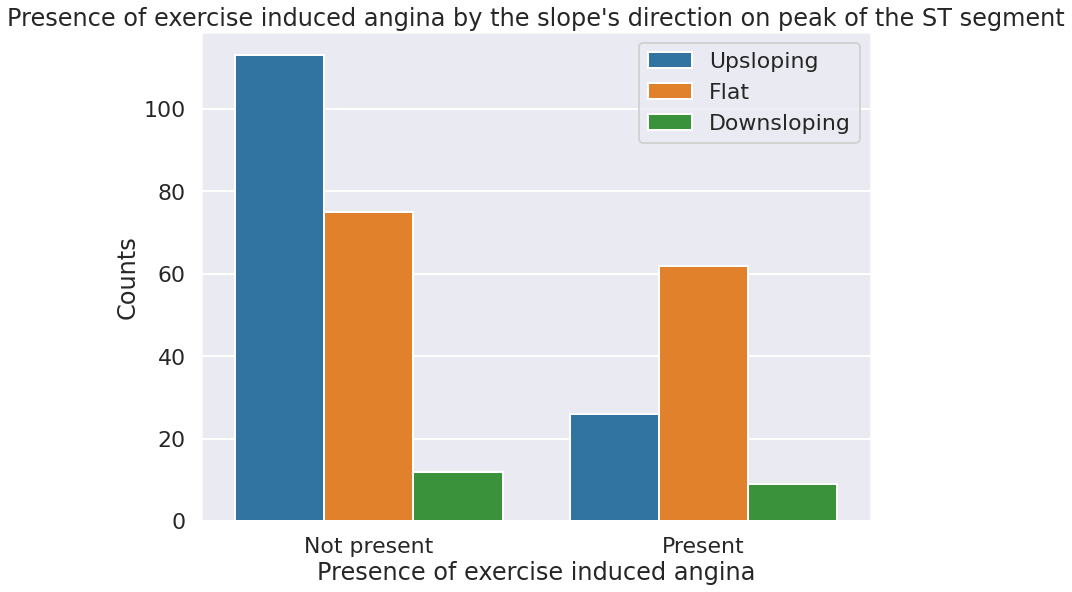

In [11]:
plt.figure(figsize=(12, 9))
g = sns.countplot("exang", hue="slope", data=df)
g.set_xticklabels(["Not present", "Present"])
plt.title("Presence of exercise induced angina by the slope's direction on peak of the ST segment")
plt.xlabel("Presence of exercise induced angina")
plt.ylabel("Counts")
plt.legend(["Upsloping", "Flat", "Downsloping"])
plt.show()

/home/andrey/PycharmProjects/Made/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


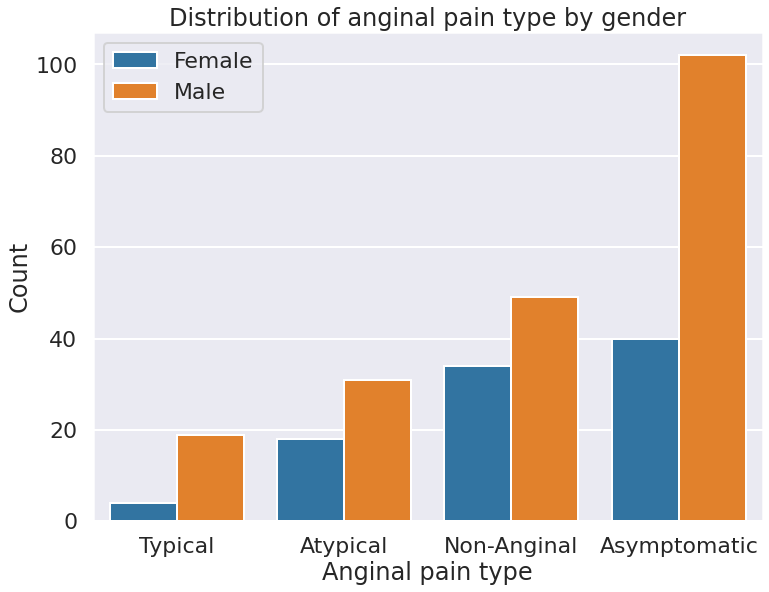

In [12]:
plt.figure(figsize=(12, 9))
g = sns.countplot("cp", hue="sex", data=df)
g.set_xticklabels(["Typical", "Atypical", "Non-Anginal", "Asymptomatic"])
plt.title("Distribution of anginal pain type by gender")
plt.xlabel("Anginal pain type")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.show()